In [1]:
import sympy
import numpy
from matplotlib import pyplot
import ipywidgets

%matplotlib inline

In [2]:
sympy.init_printing()

In [3]:
u_max = sympy.symbols('u_max')
u_star = sympy.symbols('u_star')
rho_max = sympy.symbols('rho_max')
rho_star = sympy.symbols('rho_star')
A, B = sympy.symbols('A B')

In [4]:
u_max

In [5]:
# No traffic flux at max density
eq1 = sympy.Eq(0, rho_max * u_max * (1 - A * rho_max - B * rho_max**2))
eq1

In [12]:
#Maximum flux when rho = rho_star
eq2 = sympy.Eq(0, u_max*(1-2*A*rho_star-3*B*rho_star**2))
eq2

In [13]:
# Velocity u_star when rho = rho_star
eq3 = sympy.Eq(u_star, u_max*(1-A*rho_star - B*rho_star**2))
eq3

In [14]:
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs-3*eq3.rhs)
eq4

In [15]:
eq4.simplify()

In [19]:
rho_star_sol = sympy.solve(eq4, rho_star) [0] # Access first element of solution, which is a list
rho_star_sol

In [20]:
type(rho_star_sol)

sympy.core.mul.Mul

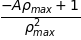

In [22]:
B_sol = sympy.solve(eq1,B)[0]
B_sol

In [23]:
eq5 = eq2.subs([(rho_star, rho_star_sol), (B, B_sol)])

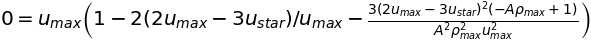

In [24]:
eq5

In [25]:
eq5.simplify

<bound method Expr.simplify of Eq(0, u_max*(1 - 2*(2*u_max - 3*u_star)/u_max - 3*(2*u_max - 3*u_star)**2*(-A*rho_max + 1)/(A**2*rho_max**2*u_max**2)))>

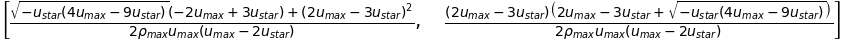

In [26]:
A_sol = sympy.solve(eq5, A)
A_sol

In [27]:
A_val_0 = A_sol[0].evalf(subs={rho_max:10.0, u_max:1.0, u_star:0.7})
A_val_0

In [29]:
A_val_1 = A_sol[1].evalf(subs={rho_max:10.0, u_max:1.0, u_star:0.7})

In [31]:
A_val = max(A_val_0, A_val_1)
A_val

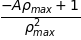

In [32]:
B_sol

In [34]:
B_val = B_sol.evalf(subs={rho_max: 10.0, A:A_val})
B_val

In [35]:
def cubic_flux(rho, u_max, A, B):
    F = rho * u_max * ( 1 - A * rho - B*rho**2 )
    return F

In [48]:
rho_max = 10.0
u_max = 1.0

L = 4.0
nx = 81
dx = L / (nx -1)
x = numpy.linspace(0, L, nx)

sigma = 1.0 
nt = 30

In [39]:
rho0 = numpy.zeros(nx)
mask = numpy.where((x<2.0))
rho0[mask] = rho_max*x[mask]/2

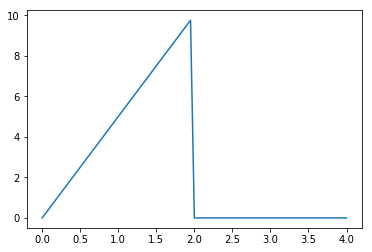

In [40]:
pyplot.plot(x,rho0)

In [57]:
def ftbs(rho0, flux, nt, dx, sigma, A, B, u_max ):
    rho_hist = [rho0.copy()]
    dt = sigma * dx / u_max
    rho = rho0.copy()
    for i in range(nt):
        rho[1:-1] = (-( flux(rho[1:-1],u_max, A, B) - flux(rho[:-2], u_max, A, B)) * dt / dx ) + rho[1:-1]
        rho_hist.append(rho.copy())
    return rho_hist

# Lax-Friedrichs

def lax_friedrichs(rho0, traffic_flux, nt, dx, sigma, A, B, u_max):
    # Initialize rho_hist
    rho_hist = [rho0.copy()]
    dt = sigma*dx/u_max
    rho = rho0.copy()

    for i in range(nt):
        rho[1:-1] = 0.5 * ( rho[2:] + rho[:-2]) - (dt/(2*dx) ) * ( traffic_flux (rho[2:], u_max, A, B) - traffic_flux (rho[:-2], u_max, A, B) )
        rho_hist.append(rho.copy())
    return rho_hist

In [59]:
rho_hist = lax_friedrichs(rho0, cubic_flux, nt, dx, sigma, A_val, B_val, u_max)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in add


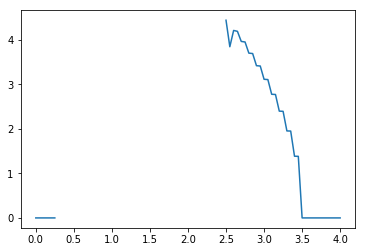

In [60]:
pyplot.plot(x, rho_hist[-1])